                  count          mean           std   min      25%     50%  \
Fresh             440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk              440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery           440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen            440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper  440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicassen        440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                       75%       max  
Fresh             16933.75  112151.0  
Milk               7190.25   73498.0  
Grocery           10655.75   92780.0  
Frozen             3554.25   60869.0  
Detergents_Paper   3922.00   40827.0  
Delicassen         1820.25   47943.0  
For K_Means:
Silhouette = 0.22
SSE value = 2985.52
Tree rules=
 |--- Detergents_Paper <= 7.74
|   |--- Delicassen <= 6.63
|   |   |--- Detergents_Paper <= 6.19
|   |   |   |--- cla

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


For Gaussian-Mixture:
Silhouette = 0.266493569357808
Loglikelihood = -6.859220217023396


<ipython-input-6-94dccd7f5f66>:506: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(20)


BIC= 6306.668559895094
AIC= 6126.850471910953
Tree rules=
 |--- Detergents_Paper <= 7.34
|   |--- Fresh <= 7.36
|   |   |--- class: 1
|   |--- Fresh >  7.36
|   |   |--- Delicassen <= 4.09
|   |   |   |--- class: 1
|   |   |--- Delicassen >  4.09
|   |   |   |--- class: 2
|--- Detergents_Paper >  7.34
|   |--- Fresh <= 6.63
|   |   |--- class: 1
|   |--- Fresh >  6.63
|   |   |--- Delicassen <= 5.16
|   |   |   |--- class: 1
|   |   |--- Delicassen >  5.16
|   |   |   |--- class: 0

train: Conf matrix Decision Tree
[[ 80   2  23]
 [  0  36   7]
 [  1   0 115]]

test: Conf matrix Decision Tree
[[57  2 10]
 [ 1 28  5]
 [ 1  0 72]]

              precision    recall  f1-score   support

           0       0.97      0.83      0.89        69
           1       0.93      0.82      0.88        34
           2       0.83      0.99      0.90        73

    accuracy                           0.89       176
   macro avg       0.91      0.88      0.89       176
weighted avg       0.90      0.89   

<Figure size 640x480 with 0 Axes>

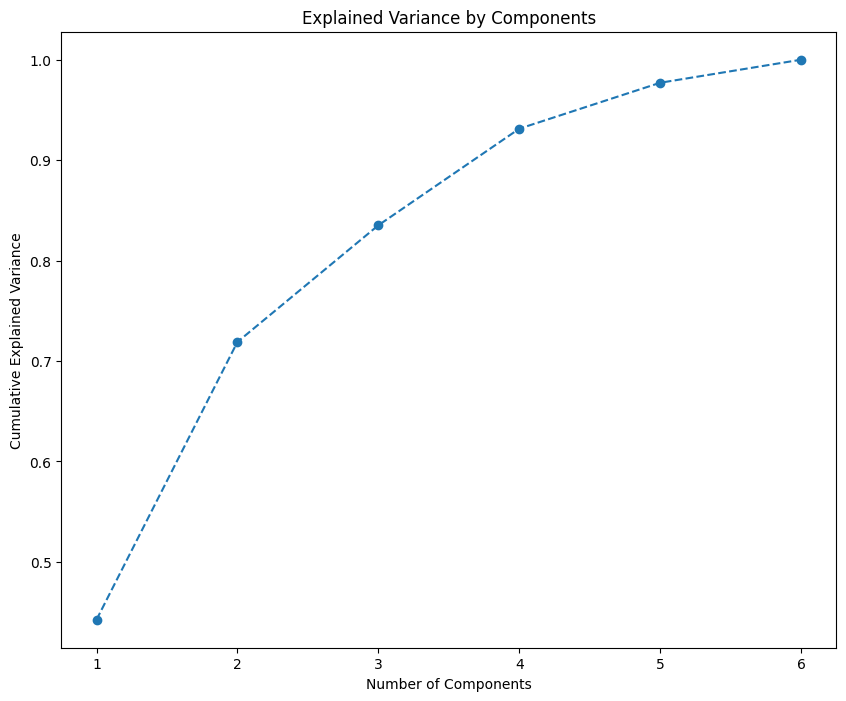

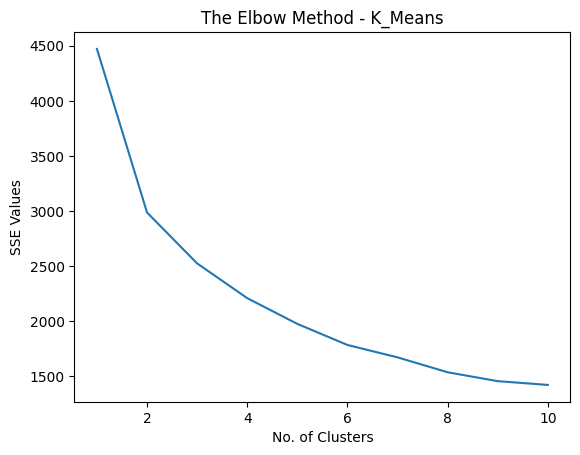

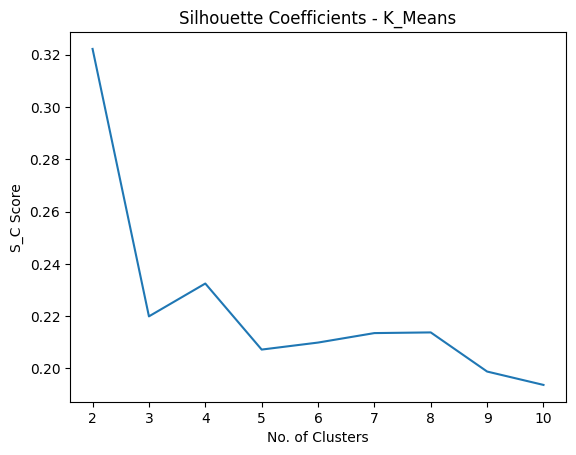

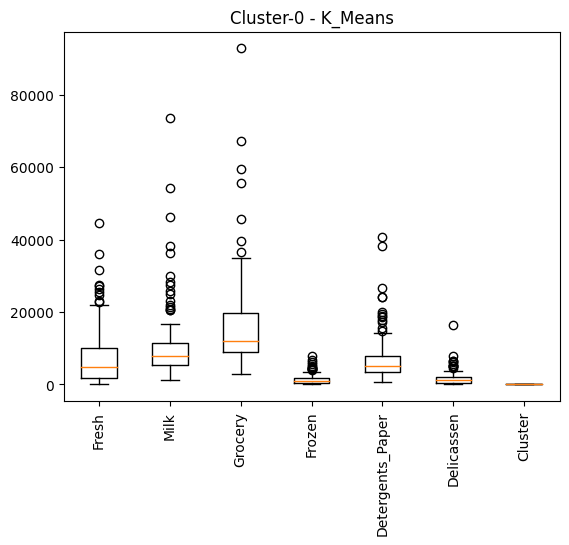

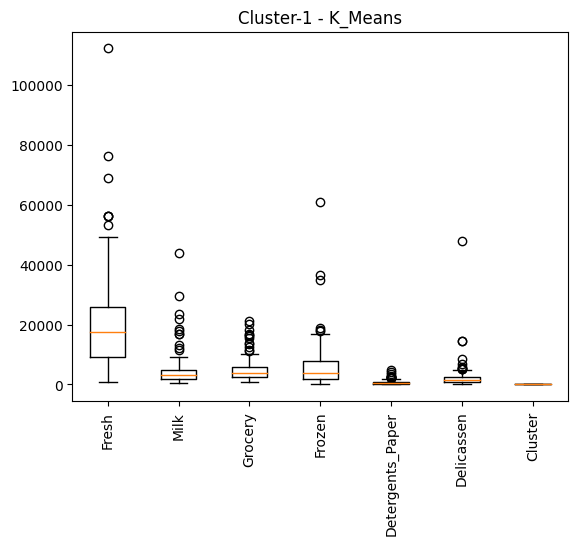

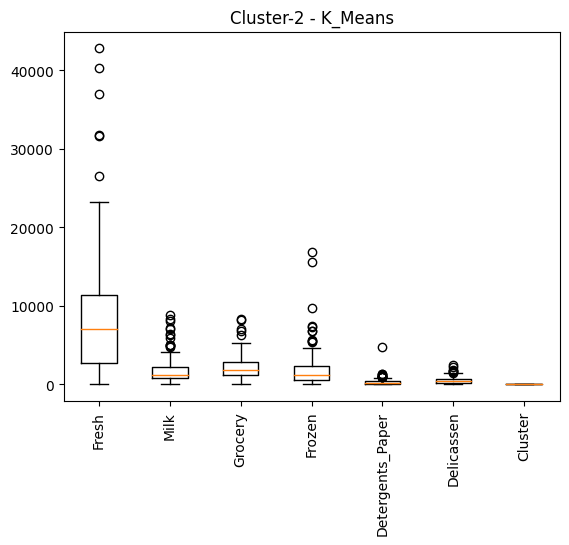

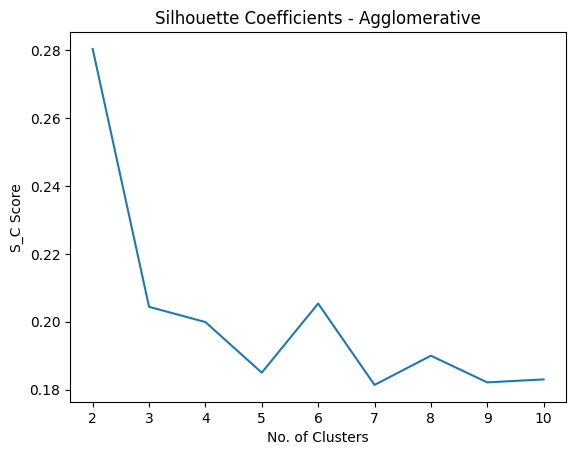

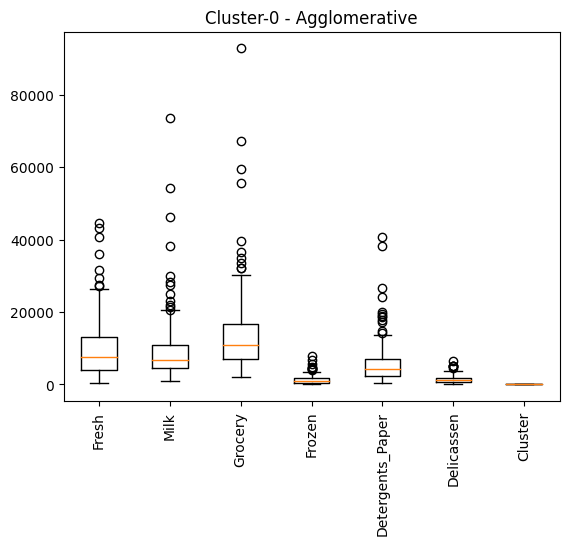

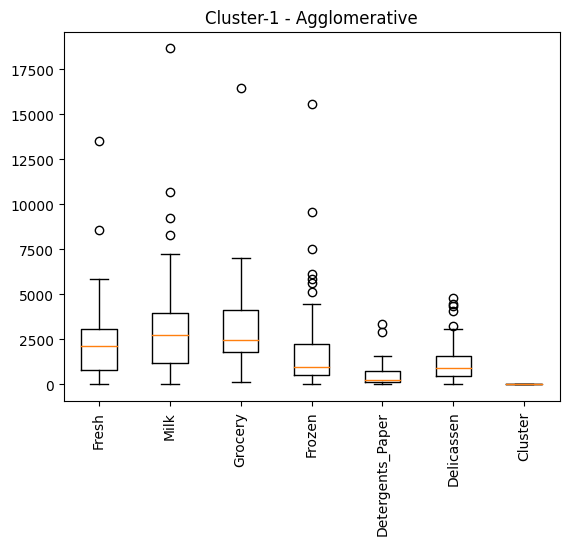

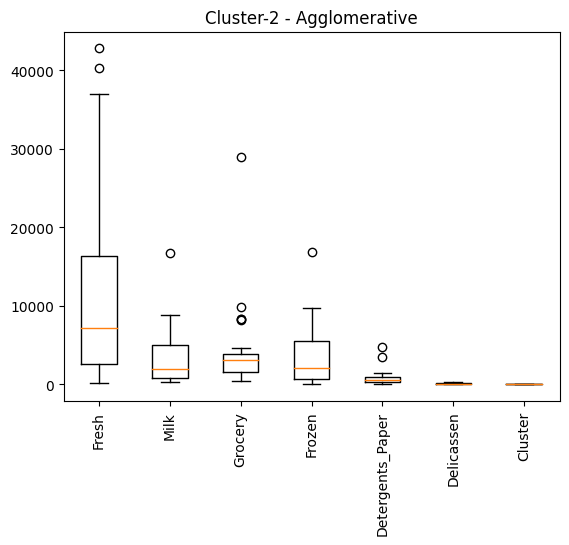

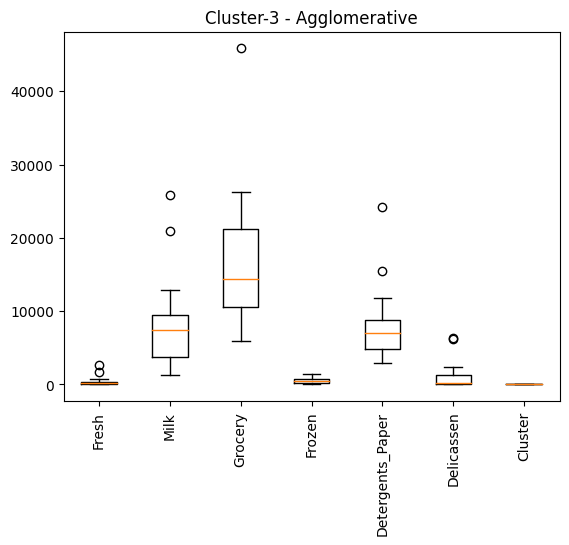

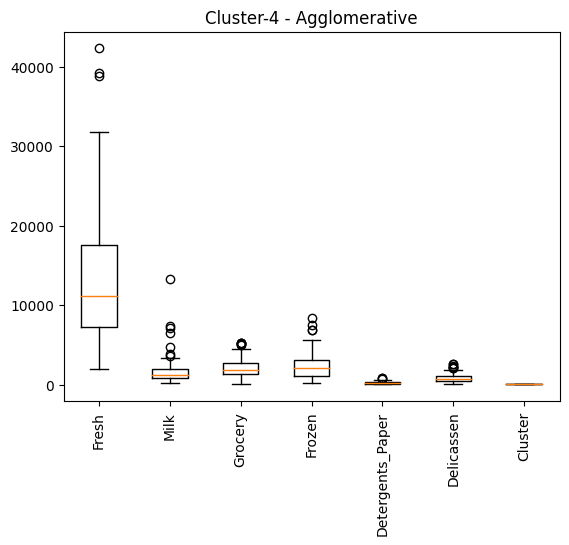

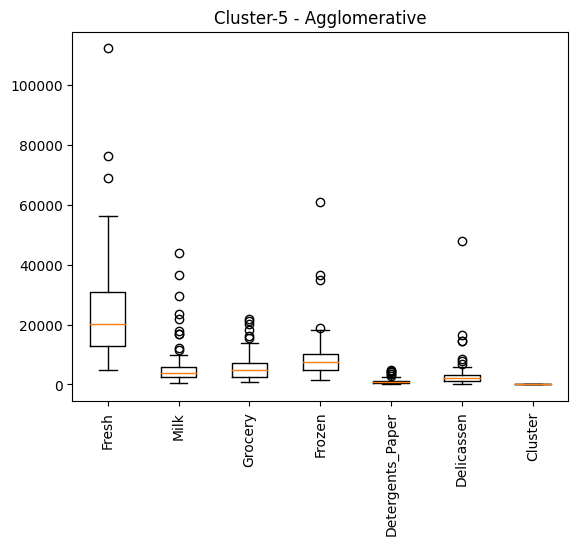

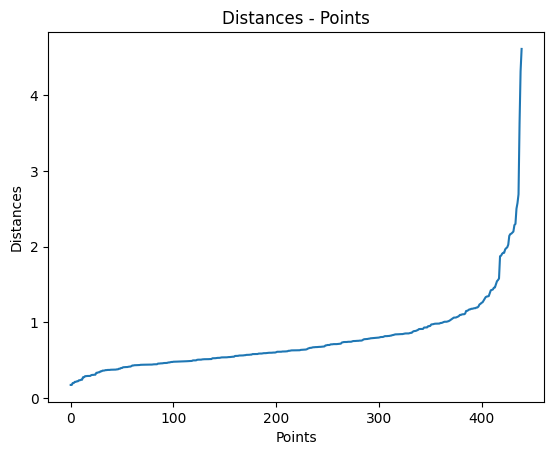

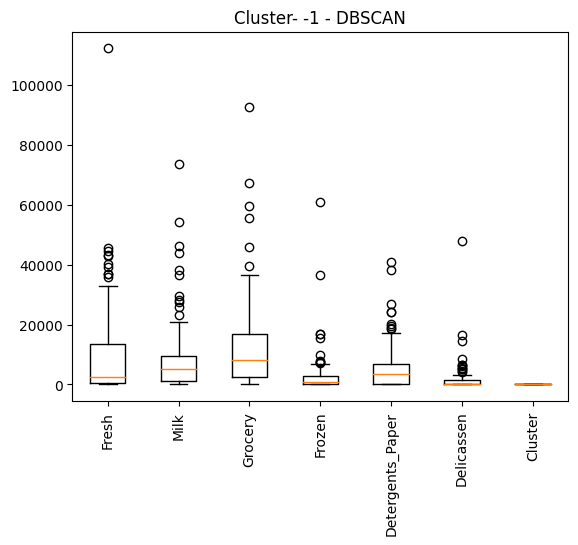

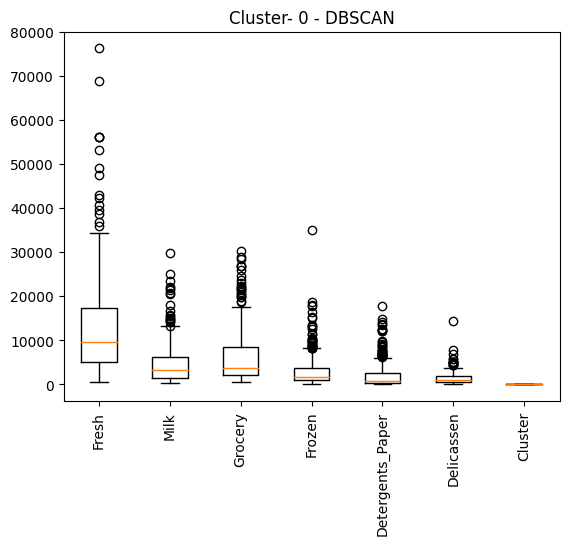

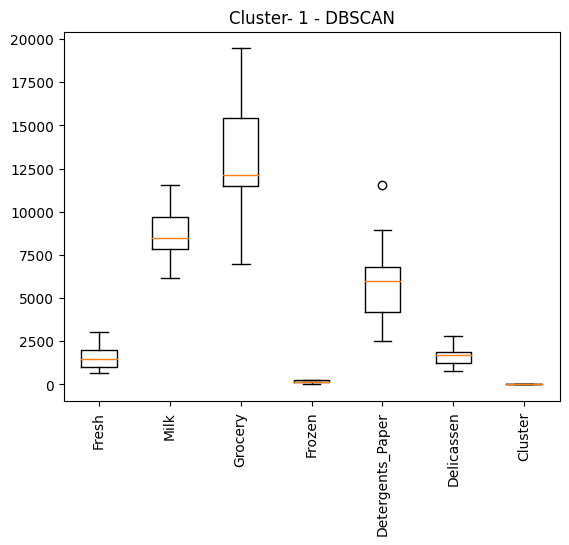

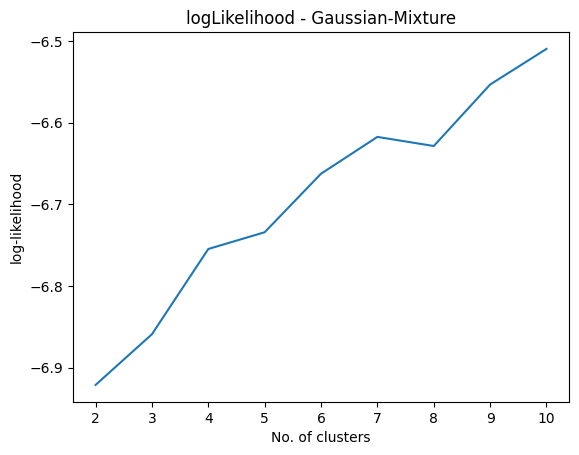

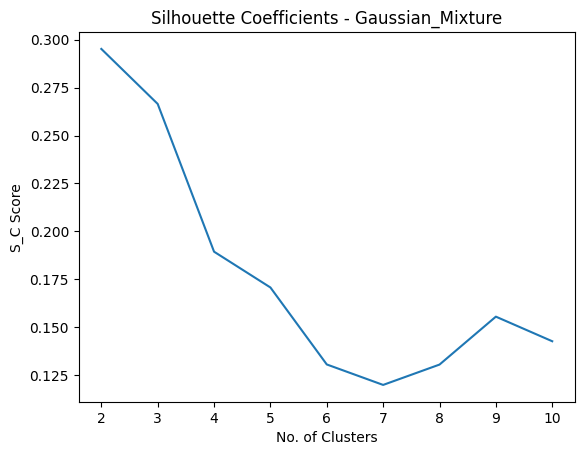

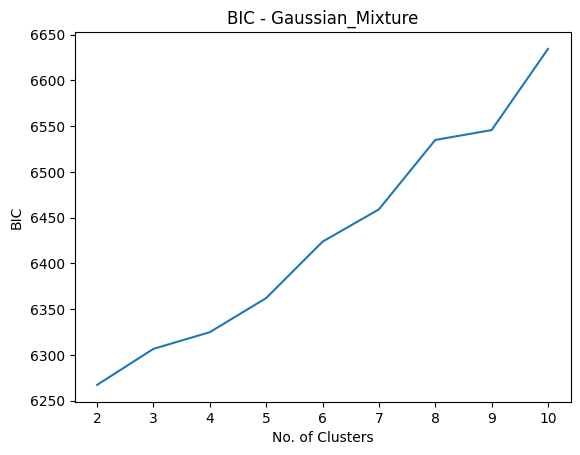

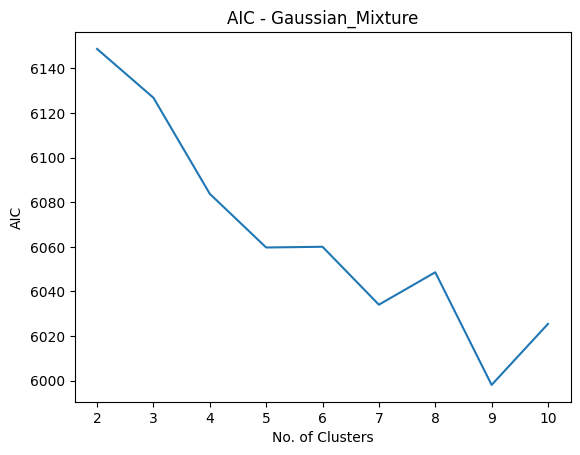

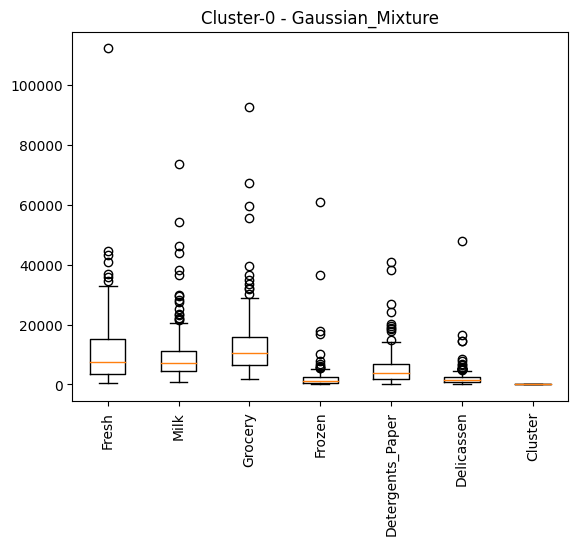

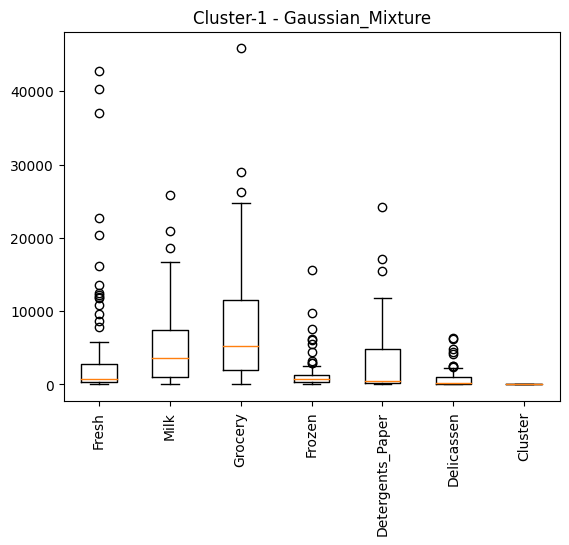

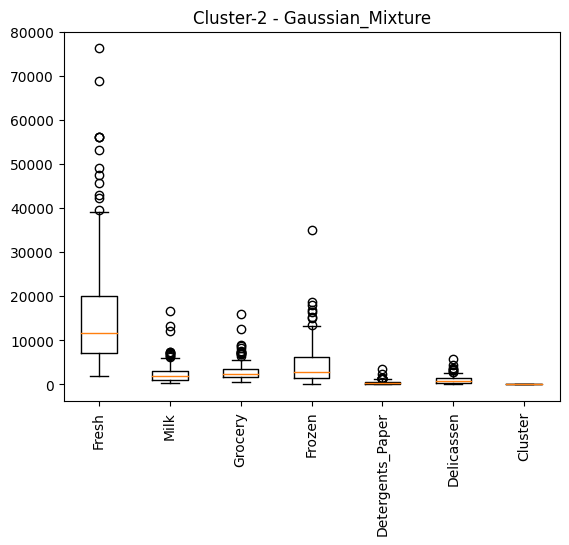

In [6]:
#==============================Clustering==============================#


# =================================Libraries=============================#

!pip install --upgrade scikit-learn # Upgrade scikit-learn to the latest version
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from collections import Counter
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import mixture
from sklearn import metrics
from sklearn.model_selection import GridSearchCV


#===========================Preprocessing_Data=========================#

data = pd.read_csv(r"/content/the_data_cluster.csv")

all_data = data.copy()
# Drop_Channel_and_Region
data.drop(["Channel", "Region"], axis=1, inplace=True)
print(data.describe().T)
# Searching_for_missing_values
data.isnull().sum()
# Scalling_Data
scaled_data = data.apply(lambda x: np.log(x))
"#=====================================================================#"
"#=====================================================================#"
clean_data = scaled_data
"#===============================PCA===================================#"
principal = PCA()
principal.fit(clean_data)

# =========================Explained_variance_ratio=====================#
principal.explained_variance_ratio_

plt.figure(0)
plt.figure(figsize=(10, 8))
plt.plot(
    range(1, 7),
    principal.explained_variance_ratio_.cumsum(),
    marker="o",
    linestyle="--",
)
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

""" 4 Components explain data at about 93% """

# ===========================PCA_for_4_components=======================#
principal_n = PCA(n_components=4)
principal_n.fit(clean_data)
pca_scaled_data = principal_n.transform(clean_data)


"#==========================K-Means_Clustering========================#"
df_k_Means = data.copy()
# =============================Elbow_Method============================#"
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(pca_scaled_data)
    sse.append(kmeans.inertia_)

# =======================Visualize_Elbow_Method========================#
plt.figure(2)
plt.plot(range(1, 11), sse)
plt.title("The Elbow Method - K_Means")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE Values")

# ========================Silhouette_Coefficients======================#
s_c = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=42)
    kmeans.fit(pca_scaled_data)
    score = silhouette_score(pca_scaled_data, kmeans.labels_)
    s_c.append(score)

# =============================Visualize_S_C============================#
plt.figure(3)
plt.plot(range(2, 11), s_c)
plt.title("Silhouette Coefficients - K_Means")
plt.xlabel("No. of Clusters")
plt.ylabel("S_C Score")

""" Combining S_C and Elbow Method => Optimal Num of Cluster: 3"""
print("For K_Means:")
print("Silhouette =", round(s_c[1], 2))
print("SSE value =", round(sse[1], 2))
# =============================Clustering===============================#
kmeans_pca = KMeans(n_clusters=3, init="k-means++", random_state=42)
kmeans_pca.fit(pca_scaled_data)

# =========================Dataframe_with_PCA===========================#

final_df_k_Means = pd.DataFrame(pca_scaled_data)
final_df_k_Means.columns = ["Component 1", "Component 2", "Component 3", "Components 4"]

""" df_k_Means is the original dataset with
    another column containing the cluster each costumer belongs to
    """

df_k_Means["Cluster"] = kmeans_pca.labels_

NumofClusters_K_Means = df_k_Means["Cluster"].unique()


# ===============================BoxPlots===============================#
idxCluster1 = df_k_Means[df_k_Means["Cluster"] == 0].index
idxCluster2 = df_k_Means[df_k_Means["Cluster"] == 1].index
idxCluster3 = df_k_Means[df_k_Means["Cluster"] == 2].index
# ===============================BoxPlot_C1=============================#
df1 = df_k_Means.loc[idxCluster1]
plt.figure(4)
plt.title("Cluster-0 - K_Means")
plt.xticks(rotation=90)
plt.boxplot(df1, labels=list(df1.columns))
# ==============================BoxPlot_C2==============================#
df2 = df_k_Means.loc[idxCluster2]
plt.figure(5)
plt.title("Cluster-1 - K_Means")
plt.xticks(rotation=90)
plt.boxplot(df2, labels=list(df2.columns))
# ===============================BoxPlot_C3=============================#
df3 = df_k_Means.loc[idxCluster3]
plt.figure(6)
plt.title("Cluster-2 - K_Means")
plt.xticks(rotation=90)
plt.boxplot(df3, labels=list(df3.columns))

# =================================Tree=================================#
perc = 0.4

X_train, X_test, Y_train, Y_test = train_test_split(
    clean_data, kmeans_pca.labels_, test_size=perc
)


clfDT_K_Cl = tree.DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=20,
)

clfDT_K_Cl.fit(X_train, Y_train)

print(
    "Tree rules=\n",
    tree.export_text(clfDT_K_Cl, feature_names=list(clean_data.columns)),
)


Y_train_pred_DT_K_Cl = clfDT_K_Cl.predict(X_train)

Y_test_pred_DT_K_Cl = clfDT_K_Cl.predict(X_test)


confMatrixTrainDT_K_Cl = confusion_matrix(Y_train, Y_train_pred_DT_K_Cl, labels=None)
confMatrixTestDT_K_Cl = confusion_matrix(Y_test, Y_test_pred_DT_K_Cl, labels=None)


print("train: Conf matrix Decision Tree")
print(confMatrixTrainDT_K_Cl)
print()

print("test: Conf matrix Decision Tree")
print(confMatrixTestDT_K_Cl)
print()

tree.export_graphviz(
    clfDT_K_Cl,
    out_file=r"tree_K_Means.dot",
    class_names=["0", "1", "2"],
    feature_names=data.columns,
    rounded=True,
    precision=2,
)
pr_y_test_pred_DT = clfDT_K_Cl.predict_proba(X_test)


print(classification_report(Y_test, Y_test_pred_DT_K_Cl))


"#=======================Agglomerative_Clustering=======================#"
df_Hc = data.copy()
final_df_Hc = pd.DataFrame(pca_scaled_data)
final_df_Hc.columns = ["Component 1", "Component 2", "Component 3", "Component 4"]
# ======================Silhouette_Coefficients==========================#
shil = []
for k in range(2, 11):
    Hclustering = AgglomerativeClustering(
        n_clusters=k, metric="euclidean", linkage="ward", compute_full_tree=True
    )
    Hclustering.fit(pca_scaled_data)
    score = silhouette_score(pca_scaled_data, Hclustering.labels_)
    shil.append(score)

# ===========================Visualiaze_S_C===============================#
plt.figure(7)
plt.plot(range(2, 11), shil)
plt.title("Silhouette Coefficients - Agglomerative")
plt.xlabel("No. of Clusters")
plt.ylabel("S_C Score")

""" Optimal number of clusters seem to be 6"""
# ===============================Clustering===============================#
Hclustering = AgglomerativeClustering(
    n_clusters=6, metric="euclidean", linkage="ward", compute_full_tree=True
)

print("Hyper-parameters:")
print(Hclustering.linkage, Hclustering.metric)  # Hyper-parameters given
print()
Hclustering.fit(pca_scaled_data)

silhouette = silhouette_score(pca_scaled_data, Hclustering.labels_)
print("For Agglomerative:")
print("Silhouette =", round(silhouette, 3))

labels = Hclustering.labels_

df_Hc["Cluster"] = labels

final_df_Hc["Cluster_Segment"] = labels

NumofClusters_Hc = df_Hc["Cluster"].unique()


idxCluster1 = df_Hc[df_Hc["Cluster"] == 0].index
idxCluster2 = df_Hc[df_Hc["Cluster"] == 1].index
idxCluster3 = df_Hc[df_Hc["Cluster"] == 2].index
idxCluster4 = df_Hc[df_Hc["Cluster"] == 3].index
idxCluster5 = df_Hc[df_Hc["Cluster"] == 4].index
idxCluster6 = df_Hc[df_Hc["Cluster"] == 5].index
# ==================================BoxPlots==============================#
# ===============================BoxPlot_C1===============================#
df4 = df_Hc.loc[idxCluster1]
plt.figure(8)
plt.title("Cluster-0 - Agglomerative")
plt.xticks(rotation=90)
plt.boxplot(df4, labels=list(df4.columns))
# =================================BoxPlot_C2=============================#
df5 = df_Hc.loc[idxCluster2]
plt.figure(9)
plt.title("Cluster-1 - Agglomerative")
plt.xticks(rotation=90)
plt.boxplot(df5, labels=list(df5.columns))
# ================================BoxPlot_C3==============================#
df6 = df_Hc.loc[idxCluster3]
plt.figure(10)
plt.title("Cluster-2 - Agglomerative")
plt.xticks(rotation=90)
plt.boxplot(df6, labels=list(df6.columns))
# ================================BoxPlot_C4==============================#
df99 = df_Hc.loc[idxCluster4]
plt.figure(11)
plt.title("Cluster-3 - Agglomerative")
plt.xticks(rotation=90)
plt.boxplot(df99, labels=list(df99.columns))
# ================================BoxPlot_C5==============================#
df98 = df_Hc.loc[idxCluster5]
plt.figure(12)
plt.title("Cluster-4 - Agglomerative")
plt.xticks(rotation=90)
plt.boxplot(df98, labels=list(df98.columns))
# ================================BoxPlot_C6==============================#
df97 = df_Hc.loc[idxCluster6]
plt.figure(13)
plt.title("Cluster-5 - Agglomerative")
plt.xticks(rotation=90)
plt.boxplot(df97, labels=list(df97.columns))
# ===============================Tree====================================#
perc = 0.4

X_train, X_test, Y_train, Y_test = train_test_split(
    clean_data, Hclustering.labels_, test_size=perc
)

clfDT_Agg_Cl = tree.DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=20,
)

clfDT_Agg_Cl.fit(X_train, Y_train)

print(
    "Tree rules=\n",
    tree.export_text(clfDT_Agg_Cl, feature_names=list(clean_data.columns)),
)


Y_train_pred_DT_Agg_Cl = clfDT_Agg_Cl.predict(X_train)

Y_test_pred_DT_Agg_Cl = clfDT_Agg_Cl.predict(X_test)


confMatrixTrainDT_Agg_Cl = confusion_matrix(
    Y_train, Y_train_pred_DT_Agg_Cl, labels=None
)
confMatrixTestDT_Agg_Cl = confusion_matrix(Y_test, Y_test_pred_DT_Agg_Cl, labels=None)


print("train: Conf matrix Decision Tree")
print(confMatrixTrainDT_Agg_Cl)
print()

print("test: Conf matrix Decision Tree")
print(confMatrixTestDT_Agg_Cl)
print()

tree.export_graphviz(
    clfDT_Agg_Cl,
    out_file=r"Agg_Cl.dot",
    class_names=["0", "1", "2", "3", "4", "5"],
    feature_names=data.columns,
    rounded=True,
    precision=2,
)

pr_y_test_pred_DT = clfDT_Agg_Cl.predict_proba(X_test)


print(classification_report(Y_test, Y_test_pred_DT_Agg_Cl))

"#=============================DBSCAN_Clustering=========================#"
df_DBSCAN = data.copy()
final_df_DBSCAN = pd.DataFrame(pca_scaled_data)
final_df_DBSCAN.columns = ["Component 1", "Component 2", "Component 3", "Component 4"]
# ========================Optimizing_Parameters===========================#
neighbors = NearestNeighbors(n_neighbors=2 * 6)  # ===2*Dimension====#
neighbors_fit = neighbors.fit(final_df_DBSCAN)
distances, indices = neighbors_fit.kneighbors(final_df_DBSCAN)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.figure(14)
plt.title("Distances - Points")
plt.xlabel("Points")
plt.ylabel("Distances")
plt.plot(distances)  # Best value for ε seems to be around 1.2#

# ======================DBSCAN=#minPts=7_AND_ε==1.2======================#
dbscan = DBSCAN(eps=1.2, min_samples=7).fit(final_df_DBSCAN)
labels = dbscan.labels_

final_df_DBSCAN["Cluster-Segment"] = labels

df_DBSCAN["Cluster"] = labels

NumofClusters_DBSCAN = df_DBSCAN["Cluster"].unique()


idxCluster1 = df_DBSCAN[df_DBSCAN["Cluster"] == -1].index
idxCluster2 = df_DBSCAN[df_DBSCAN["Cluster"] == 0].index
idxCluster3 = df_DBSCAN[df_DBSCAN["Cluster"] == 1].index
# ===============================BoxPlots================================#
# ================================BoxPlot_C1=============================#
df7 = df_DBSCAN.loc[idxCluster1]
plt.figure(15)
plt.title("Cluster- -1 - DBSCAN")
plt.xticks(rotation=90)
plt.boxplot(df7, labels=list(df7.columns))
# ===============================BoxPlot_C2==============================#
df8 = df_DBSCAN.loc[idxCluster2]
plt.figure(16)
plt.title("Cluster- 0 - DBSCAN")
plt.xticks(rotation=90)
plt.boxplot(df8, labels=list(df8.columns))
# ===============================BoxPlot_C3==============================#
df14 = df_DBSCAN.loc[idxCluster3]
plt.figure(17)
plt.title("Cluster- 1 - DBSCAN")
plt.xticks(rotation=90)
plt.boxplot(df14, labels=list(df14.columns))
# ===============================Tree====================================#
perc = 0.4

X_train, X_test, Y_train, Y_test = train_test_split(
    clean_data, dbscan.labels_, test_size=perc
)

clfDT_DBSCAN_Cl = tree.DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=20,
)

clfDT_DBSCAN_Cl.fit(X_train, Y_train)

print(
    "Tree rules=\n",
    tree.export_text(clfDT_DBSCAN_Cl, feature_names=list(clean_data.columns)),
)


Y_train_pred_DT_DBSCAN_Cl = clfDT_DBSCAN_Cl.predict(X_train)

Y_test_pred_DT_DBSCAN_Cl = clfDT_DBSCAN_Cl.predict(X_test)


confMatrixTrainDT_DBSCAN_Cl = confusion_matrix(
    Y_train, Y_train_pred_DT_DBSCAN_Cl, labels=None
)
confMatrixTestDT_DBSCAN_Cl = confusion_matrix(
    Y_test, Y_test_pred_DT_DBSCAN_Cl, labels=None
)


print("train: Conf matrix Decision Tree")
print(confMatrixTrainDT_DBSCAN_Cl)
print()

print("test: Conf matrix Decision Tree")
print(confMatrixTestDT_DBSCAN_Cl)
print()
tree.export_graphviz(
    clfDT_DBSCAN_Cl,
    out_file=r"tree_K_Means.dot",
    class_names=["-1", "0", "1"],
    feature_names=data.columns,
    rounded=True,
    precision=2,
)

pr_y_test_pred_DT_DBSCAN_Cl = clfDT_DBSCAN_Cl.predict_proba(X_test)


print(classification_report(Y_test, Y_test_pred_DT_DBSCAN_Cl))


"#=======================Gaussian-Mixture_Clustering====================#"
df_gmm = data.copy()
final_df_gmm = pd.DataFrame(pca_scaled_data)
final_df_gmm.columns = ["Component 1", "Component 2", "Component 3", "Component 4"]

# ===============================logLikelihood===========================#
logLikelihood = []
for n in range(2, 11):
    gmm = mixture.GaussianMixture(n_components=n, covariance_type="full").fit(
        pca_scaled_data
    )
    logLikelihood.append(gmm.score(pca_scaled_data))

# ==========================Visualize_logLikelihood======================#
plt.figure(18)
plt.plot(range(2, 11), logLikelihood)
plt.title("logLikelihood - Gaussian-Mixture")
plt.xlabel("No. of clusters")
plt.ylabel("log-likelihood")

# ======================Silhouette_Coefficients==========================#
s_c1 = []
for n in range(2, 11):
    gmm = mixture.GaussianMixture(n_components=n, covariance_type="full").fit(
        pca_scaled_data
    )
    gmm.fit(pca_scaled_data)
    score = silhouette_score(pca_scaled_data, gmm.predict(pca_scaled_data))
    s_c1.append(score)

# ==========================Visualiaze_S_C==============================#
plt.figure(19)
plt.plot(range(2, 11), s_c1)
plt.title("Silhouette Coefficients - Gaussian_Mixture")
plt.xlabel("No. of Clusters")
plt.ylabel("S_C Score")

print("For Gaussian-Mixture:")
print("Silhouette =", s_c1[1])
print("Loglikelihood =", logLikelihood[1])
# ================================BIC-AIC===============================#
bicS = []
aicS = []
for n in range(2, 11):
    gmm = mixture.GaussianMixture(n, covariance_type="full").fit(pca_scaled_data)
    bic_score = gmm.bic(pca_scaled_data)
    aic_score = gmm.aic(pca_scaled_data)
    bicS.append(bic_score)
    aicS.append(aic_score)

# ============================Visualize_BIC============================#
plt.figure(20)
plt.plot(range(2, 11), bicS)
plt.title("BIC - Gaussian_Mixture")
plt.xlabel("No. of Clusters")
plt.ylabel("BIC")
# ==========================Visualize_AIC=============================#
plt.figure(21)
plt.plot(range(2, 11), aicS)
plt.title("AIC - Gaussian_Mixture")
plt.xlabel("No. of Clusters")
plt.ylabel("AIC")

print("BIC=", bicS[1])
print("AIC=", aicS[1])

"""Optimal number of clusters seem to be 3"""
# ==========================Clustering===============================#
gmm = mixture.GaussianMixture(n_components=3, covariance_type="full").fit(
    pca_scaled_data
)
labels = gmm.predict(pca_scaled_data)

df_gmm["Cluster"] = labels

NumofClusters_gmm = df_gmm["Cluster"].unique()


idxCluster1 = df_gmm[df_gmm["Cluster"] == 0].index
idxCluster2 = df_gmm[df_gmm["Cluster"] == 1].index
idxCluster3 = df_gmm[df_gmm["Cluster"] == 2].index

# =============================BoxPlots============================#
# ===========================BoxPlot_C1============================#
df9 = df_gmm.loc[idxCluster1]
plt.figure(22)
plt.title("Cluster-0 - Gaussian_Mixture")
plt.xticks(rotation=90)
plt.boxplot(df9, labels=list(df9.columns))
# ==========================BoxPlot_C2============================#
df10 = df_gmm.loc[idxCluster2]
plt.figure(23)
plt.title("Cluster-1 - Gaussian_Mixture")
plt.xticks(rotation=90)
plt.boxplot(df10, labels=list(df10.columns))
# =========================BoxPlot_C3=============================#
df11 = df_gmm.loc[idxCluster3]
plt.figure(24)
plt.title("Cluster-2 - Gaussian_Mixture")
plt.xticks(rotation=90)
plt.boxplot(df11, labels=list(df11.columns))
# ===========================Tree=================================#
perc = 0.4

X_train, X_test, Y_train, Y_test = train_test_split(clean_data, labels, test_size=perc)

clfDT_gmm_Cl = tree.DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    max_depth=3,
    min_samples_leaf=3,
    min_samples_split=20,
)

clfDT_gmm_Cl.fit(X_train, Y_train)

print(
    "Tree rules=\n",
    tree.export_text(clfDT_gmm_Cl, feature_names=list(clean_data.columns)),
)


Y_train_pred_DT_gmm_Cl = clfDT_gmm_Cl.predict(X_train)

Y_test_pred_DT_gmm_Cl = clfDT_gmm_Cl.predict(X_test)


confMatrixTrainDT_gmm_Cl = confusion_matrix(
    Y_train, Y_train_pred_DT_gmm_Cl, labels=None
)
confMatrixTestDT_gmm_Cl = confusion_matrix(Y_test, Y_test_pred_DT_gmm_Cl, labels=None)


print("train: Conf matrix Decision Tree")
print(confMatrixTrainDT_gmm_Cl)
print()

print("test: Conf matrix Decision Tree")
print(confMatrixTestDT_gmm_Cl)
print()
tree.export_graphviz(
    clfDT_gmm_Cl,
    out_file=r"tree_Gmm.dot",
    class_names=["0", "1", "2"],
    feature_names=data.columns,
    rounded=True,
    precision=2,
)
pr_y_test_pred_DT_gmm_Cl = clfDT_gmm_Cl.predict_proba(X_test)


print(classification_report(Y_test, Y_test_pred_DT_gmm_Cl))
